In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt

# Ziel: Wir erstellen ein Perzeptron, das Datenpunkte klassifizieren kann, die linear separierbar sind.

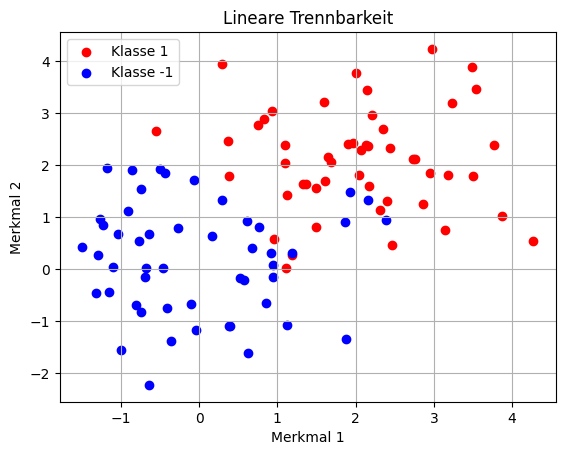

In [ ]:
# Zufällige Datenpunkte generieren
np.random.seed(0)  # Für reproduzierbare Ergebnisse

# Klasse 1: Punkte um (2, 2)
class_1 = np.random.randn(50, 2) + 2

# Klasse -1: Punkte um (0, 0)
class_2 = np.random.randn(50, 2)

# Labels für die Klassen
labels_1 = np.ones((50, 1))  # Label 1 für die erste Klasse
labels_2 = -np.ones((50, 1))  # Label -1 für die zweite Klasse

# Daten und Labels zusammenfügen
X = np.vstack((class_1, class_2))
y = np.vstack((labels_1, labels_2))

# Datensatz plotten
plt.scatter(class_1[:, 0], class_1[:, 1], color="red", label="Klasse 1")
plt.scatter(class_2[:, 0], class_2[:, 1], color="blue", label="Klasse -1")
plt.title("Lineare Trennbarkeit")
plt.xlabel("Merkmal 1")
plt.ylabel("Merkmal 2")
plt.legend()
plt.grid(True)
plt.show()

# Erklärung:
# - Klasse 1 (rot) und Klasse -1 (blau) sind klar linear trennbar.
# - Unser Ziel ist es, eine Entscheidungsgrenze zu finden, die diese Klassen trennt.

In [ ]:
# Perzeptron-Klasse definieren
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate  # Lernrate
        self.epochs = epochs  # Anzahl der Trainingsdurchläufe
        self.weights = None  # Gewichtungsvektor
        self.bias = None  # Bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialisiere die Gewichte mit 0
        self.bias = 0  # Initialisiere den Bias mit 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Vorhersage: gewichtete Summe + Bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)  # Aktivierungsfunktion (Schrittfunktion)

                # Gewichte aktualisieren, falls die Vorhersage falsch ist
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        # Vorhersagen berechnen
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)  # Aktivierungsfunktion (Schrittfunktion)

# Erklärung:
# - Das Perzeptron passt seine Gewichte an, wenn eine falsche Vorhersage gemacht wird.
# - Die Lernrate steuert, wie stark die Anpassung ist.

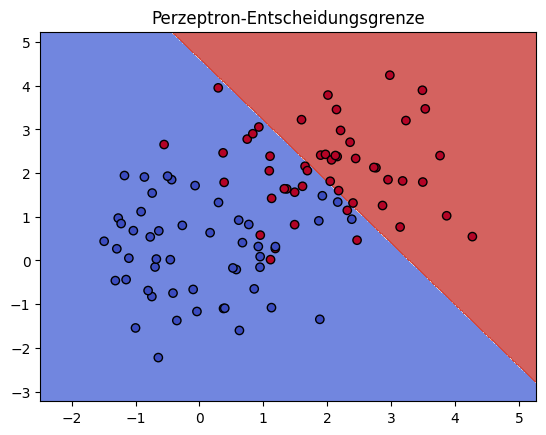

In [ ]:
# Perzeptron initialisieren und trainieren
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Vorhersagen treffen
y_pred = perceptron.predict(X)

# Visualisierung der Entscheidungsgrenze
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title("Perzeptron-Entscheidungsgrenze")
    plt.show()

# Entscheidungsgrenze plotten
plot_decision_boundary(X, y, perceptron)

# Erklärung:
# - Die Entscheidungsgrenze teilt die beiden Klassen.
# - Die Gewichte und der Bias des Perzeptrons bestimmen die Position und Richtung der Grenze.

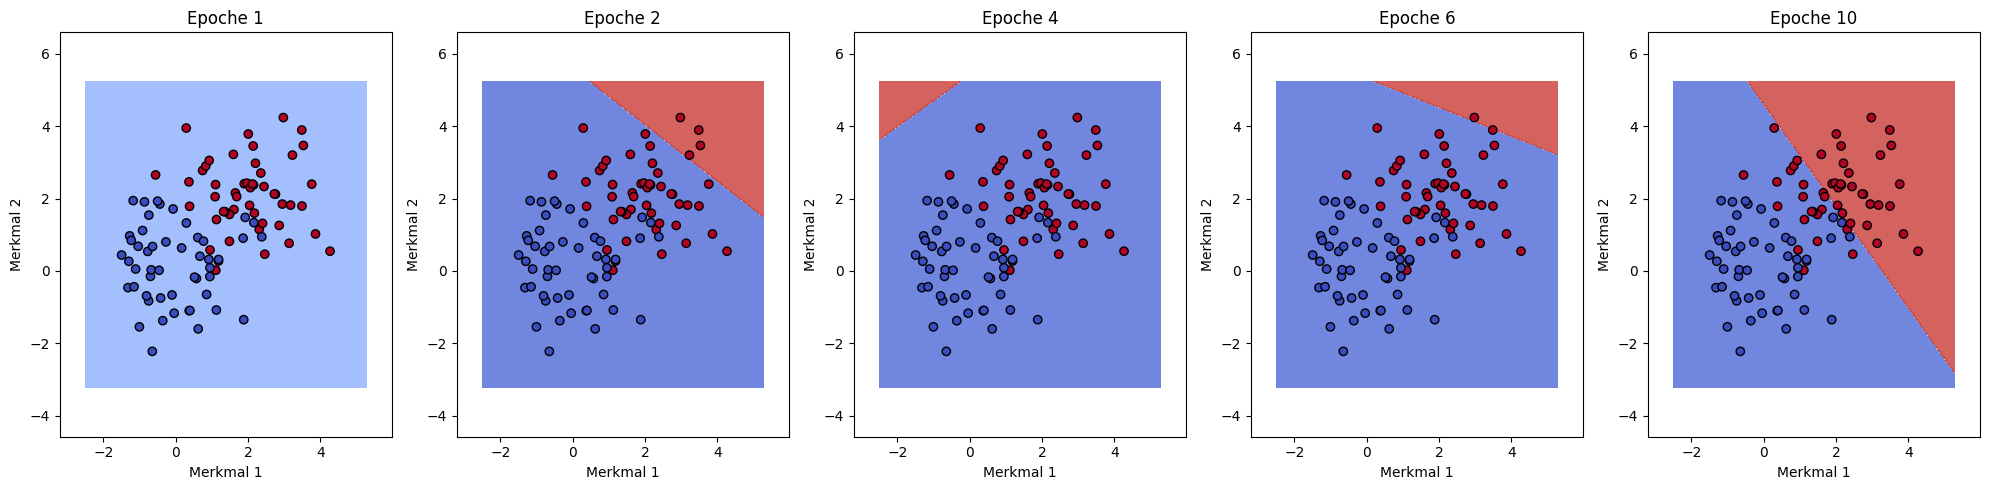

In [ ]:
# Perzeptron-Klasse mit Visualisierung
class PerceptronWithVisualization:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.history = []  # Speichert die Gewichte und den Bias für jede Epoche

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training über mehrere Epochen
        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Aktualisierung der Gewichte bei falscher Vorhersage
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

            # Speichere die Gewichte und den Bias nach jeder Epoche
            self.history.append((self.weights.copy(), self.bias))

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Funktion zur Visualisierung der Entscheidungsgrenzen für mehrere Epochen
def plot_decision_boundary_progress_grid(X, y, history, epochs_to_plot):
    n_plots = len(epochs_to_plot)  # Anzahl der Epochen, die geplottet werden
    plt.figure(figsize=(20, 5))  # Breite und Höhe der gesamten Darstellung

    for idx, epoch in enumerate(epochs_to_plot):
        weights, bias = history[epoch]  # Gewichte und Bias der aktuellen Epoche
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        grid = np.c_[xx.ravel(), yy.ravel()]

        # Vorhersagen basierend auf den aktuellen Gewichten und Bias
        Z = np.sign(np.dot(grid, weights) + bias)
        Z = Z.reshape(xx.shape)

        # Subplot für die aktuelle Epoche
        plt.subplot(1, n_plots, idx + 1)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor="k", cmap=plt.cm.coolwarm)
        plt.title(f"Epoche {epoch + 1}")
        plt.xlabel("Merkmal 1")
        plt.ylabel("Merkmal 2")
        plt.axis("equal")  # Gleiche Skalierung für beide Achsen

    plt.tight_layout()
    plt.show()

# Training und Visualisierung
perceptron = PerceptronWithVisualization(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Gewichte und Bias nach jeder Epoche abrufen
history = perceptron.history

# Plotten der Entscheidungsgrenze für ausgewählte Epochen
epochs_to_plot = [0, 1, 3, 5, 9]  # Entscheide, welche Epochen visualisiert werden sollen
plot_decision_boundary_progress_grid(X, y, history, epochs_to_plot)

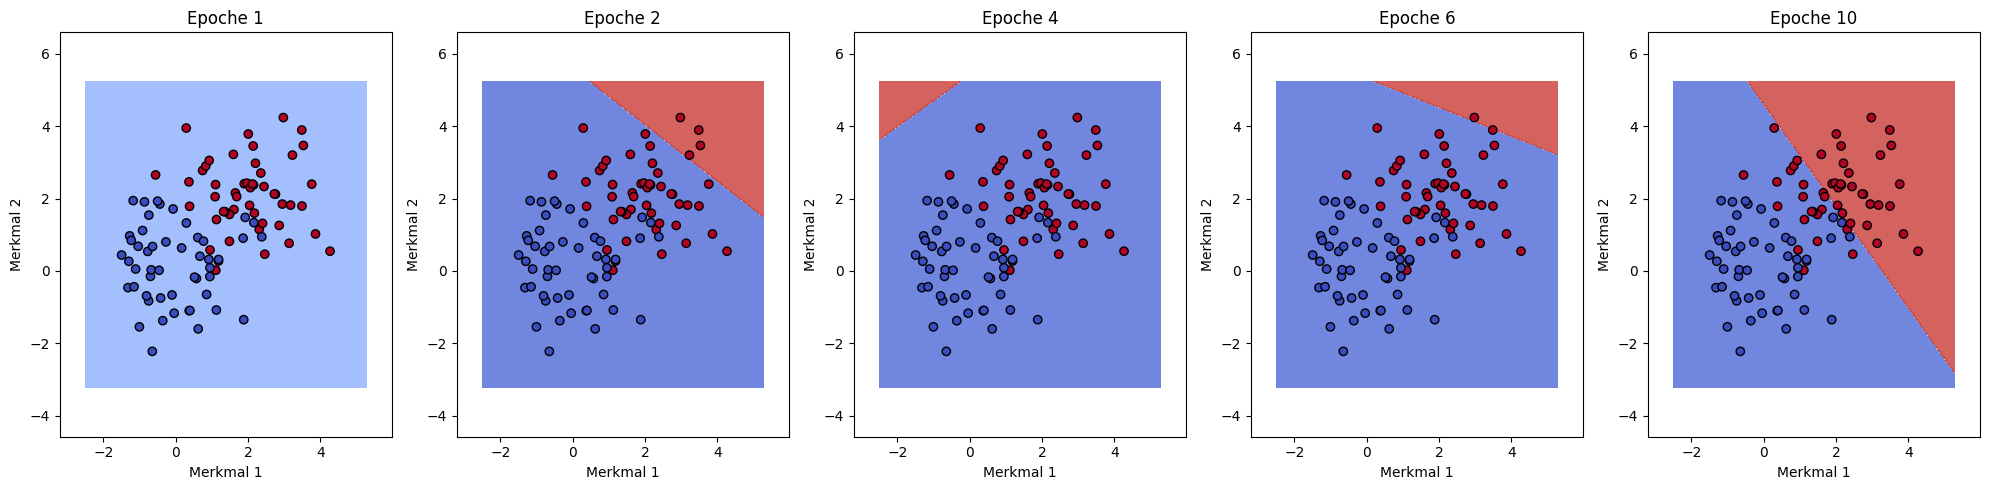

In [ ]:
# Funktion zur Visualisierung der Entscheidungsgrenzen für mehrere Epochen
def plot_decision_boundary_progress_grid(X, y, history, epochs_to_plot):
    n_plots = len(epochs_to_plot)  # Anzahl der Epochen, die geplottet werden
    plt.figure(figsize=(20, 5))  # Breite und Höhe der gesamten Darstellung

    for idx, epoch in enumerate(epochs_to_plot):
        weights, bias = history[epoch]  # Gewichte und Bias der aktuellen Epoche
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        grid = np.c_[xx.ravel(), yy.ravel()]

        # Vorhersagen basierend auf den aktuellen Gewichten und Bias
        Z = np.sign(np.dot(grid, weights) + bias)
        Z = Z.reshape(xx.shape)

        # Subplot für die aktuelle Epoche
        plt.subplot(1, n_plots, idx + 1)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor="k", cmap=plt.cm.coolwarm)
        plt.title(f"Epoche {epoch + 1}")
        plt.xlabel("Merkmal 1")
        plt.ylabel("Merkmal 2")
        plt.axis("equal")  # Gleiche Skalierung für beide Achsen

    plt.tight_layout()
    plt.show()

# Training und Visualisierung
perceptron = PerceptronWithVisualization(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Gewichte und Bias nach jeder Epoche abrufen
history = perceptron.history

# Plotten der Entscheidungsgrenze für ausgewählte Epochen
epochs_to_plot = [0, 1, 3, 5, 9]  # Entscheide, welche Epochen visualisiert werden sollen
plot_decision_boundary_progress_grid(X, y, history, epochs_to_plot)

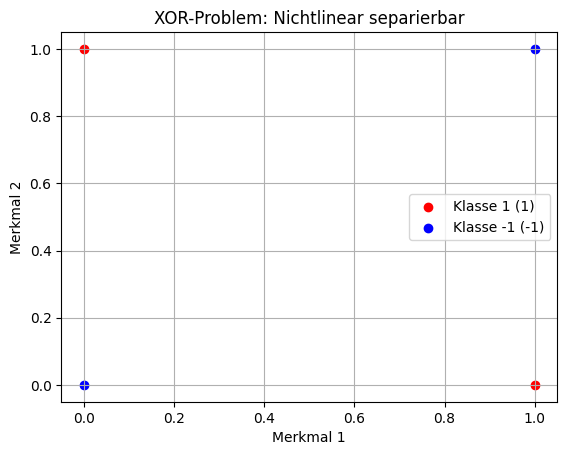

In [ ]:
# XOR-Datensatz erstellen
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([-1, 1, 1, -1])  # XOR-Labels: -1 für gleiche Werte, 1 für unterschiedliche Werte

# XOR-Datensatz visualisieren
plt.scatter(X_xor[y_xor == 1][:, 0], X_xor[y_xor == 1][:, 1], color="red", label="Klasse 1 (1)")
plt.scatter(X_xor[y_xor == -1][:, 0], X_xor[y_xor == -1][:, 1], color="blue", label="Klasse -1 (-1)")
plt.title("XOR-Problem: Nichtlinear separierbar")
plt.xlabel("Merkmal 1")
plt.ylabel("Merkmal 2")
plt.legend()
plt.grid(True)
plt.show()

# Erklärung:
# - Die Punkte in Klasse 1 (rot) liegen diagonal verteilt.
# - Einfache Perzeptrons können nur lineare Grenzen erstellen, daher können sie diese Verteilung nicht trennen.

In [ ]:
# XOR-Datensatz erstellen
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor_tanh = np.array([-1, 1, 1, -1])  # Labels für tanh: -1 und 1
y_xor_sigmoid = np.array([0, 1, 1, 0])  # Labels für sigmoid: 0 und 1

# Funktion zum Plotten der Entscheidungsgrenze mit Legende
def plot_decision_boundary_with_legend(X, y, model, activation):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Vorhersagen des Modells für das Gitter
    Z = model.predict(grid).reshape(xx.shape)

    # Plotten der Entscheidungsgrenze
    plt.figure(figsize=(6, 6))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.colorbar(contour, label=f"Ausgabewert ({activation})")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(f"Finale Entscheidungsgrenze mit MLP ({activation})")
    plt.xlabel("Merkmal 1")
    plt.ylabel("Merkmal 2")
    plt.grid(True)
    plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step


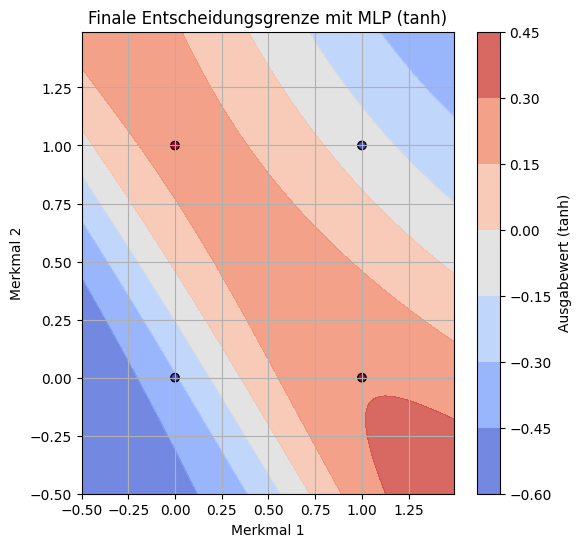

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# MLP-Modell für `tanh`
mlp_tanh = Sequential([
    Input(shape=(2,)),                  # Eingabe mit Input-Schicht
    Dense(4, activation='tanh'),        # Versteckte Schicht mit 4 Neuronen
    Dense(1, activation='tanh')         # Ausgabeschicht mit `tanh`
])

# Modell zusammenstellen
mlp_tanh.compile(optimizer='adam', loss='mse')

# Training des Modells mit `tanh`
mlp_tanh.fit(X_xor, y_xor_tanh, epochs=500, verbose=0)

# Entscheidungsgrenze für `tanh` plotten
plot_decision_boundary_with_legend(X_xor, y_xor_tanh, mlp_tanh, "tanh")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


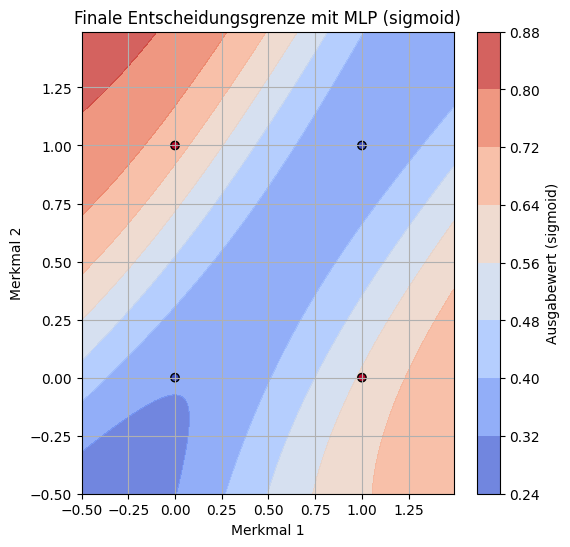

In [ ]:
# MLP-Modell für `sigmoid`
mlp_sigmoid = Sequential([
    Dense(4, activation='tanh', input_shape=(2,)),  # Versteckte Schicht mit 4 Neuronen
    Dense(1, activation='sigmoid')                 # Ausgabeschicht mit `sigmoid`
])

# Modell zusammenstellen
mlp_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training des Modells mit `sigmoid`
mlp_sigmoid.fit(X_xor, y_xor_sigmoid, epochs=500, verbose=0)

# Entscheidungsgrenze für `sigmoid` plotten
plot_decision_boundary_with_legend(X_xor, y_xor_sigmoid, mlp_sigmoid, "sigmoid")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


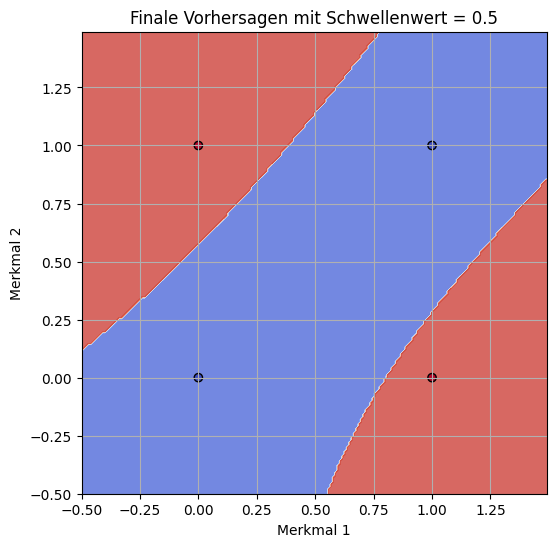

In [ ]:
# Funktion zur Visualisierung von Vorhersagen mit Schwellenwert
def plot_predictions_with_threshold(X, y, model, threshold=0.5):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Vorhersagen des Modells für das Gitter
    Z = (model.predict(grid) > threshold).astype(int).reshape(xx.shape)

    # Plotten der Entscheidungsgrenze basierend auf Schwellenwert
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(f"Finale Vorhersagen mit Schwellenwert = {threshold}")
    plt.xlabel("Merkmal 1")
    plt.ylabel("Merkmal 2")
    plt.grid(True)
    plt.show()

# Vorhersagen basierend auf einem Schwellenwert plotten
plot_predictions_with_threshold(X_xor, y_xor_sigmoid, mlp_sigmoid, threshold=0.5)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Trainingsdaten: (60000, 28, 28), Labels: (60000,)
Testdaten: (10000, 28, 28), Labels: (10000,)


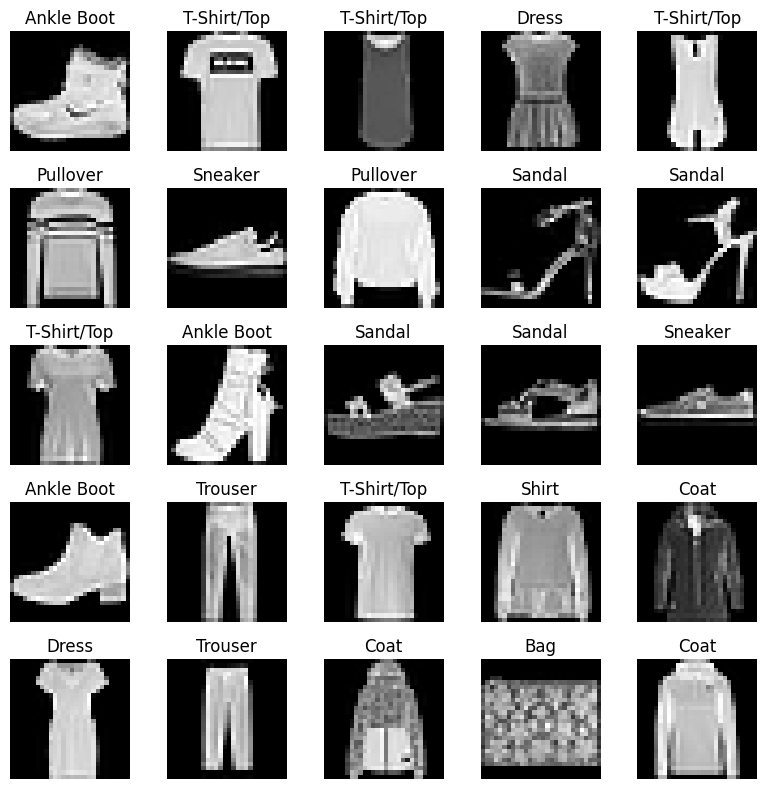

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Fashion MNIST laden
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Klassenlabels
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Datenform und erste Analyse
print(f"Trainingsdaten: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testdaten: {X_test.shape}, Labels: {y_test.shape}")

# Beispielbilder visualisieren
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Erklärung:
# - Fashion MNIST enthält 70.000 Graustufenbilder (60.000 Training, 10.000 Test).
# - Jedes Bild hat eine Größe von 28x28 Pixeln und gehört zu einer von 10 Klassen.
# - Wir visualisieren 25 Beispielbilder mit den zugehörigen Labels.

In [ ]:
import tensorflow as tf

# Normalisierung der Daten (Werte zwischen 0 und 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten der Bilder (28x28 -> 784) für das MLP
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened Trainingsdaten: {X_train_flatten.shape}")
print(f"Flattened Testdaten: {X_test_flatten.shape}")

# Labels in One-Hot-Codierung umwandeln (für Keras MLP)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Erklärung:
# - Die Pixelwerte (0-255) werden auf den Bereich 0-1 normalisiert.
# - Die Bilder werden in Vektoren umgewandelt, da MLPs keine 2D-Strukturen direkt verarbeiten.
# - Labels werden in One-Hot-Codierung umgewandelt, damit sie als Zielwerte im Klassifikationsproblem verwendet werden können.

Flattened Trainingsdaten: (60000, 784)
Flattened Testdaten: (10000, 784)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# MLP-Modell erstellen
mlp_model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),  # Erste versteckte Schicht
    Dropout(0.2),                                       # Dropout zur Vermeidung von Overfitting
    Dense(64, activation='relu'),                       # Zweite versteckte Schicht
    Dense(10, activation='softmax')                     # Ausgabe-Schicht für 10 Klassen
])

# Modell zusammenstellen
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Erklärung:
# - Die erste Schicht hat 128 Neuronen und nutzt ReLU als Aktivierungsfunktion.
# - Dropout deaktiviert zufällig 20% der Neuronen während des Trainings.
# - Die Ausgabe-Schicht hat 10 Neuronen (für die 10 Klassen) und verwendet Softmax für Wahrscheinlichkeiten.
# - `categorical_crossentropy` ist die geeignete Verlustfunktion für Multiklassenprobleme.

In [ ]:
# Modell trainieren
history = mlp_model.fit(X_train_flatten, y_train_one_hot,
                        validation_split=0.2,  # 20% der Trainingsdaten für Validierung
                        epochs=20,
                        batch_size=32,
                        verbose=1)

# Erklärung:
# - `validation_split=0.2`: 20% der Trainingsdaten werden für die Validierung genutzt.
# - `epochs=20`: Das Modell wird 20 Mal durch die gesamten Trainingsdaten trainiert.
# - `batch_size=32`: Die Daten werden in Blöcken von 32 Bildern verarbeitet.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4931 - loss: 1.3923 - val_accuracy: 0.7547 - val_loss: 0.6617
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7522 - loss: 0.6706 - val_accuracy: 0.7930 - val_loss: 0.5601
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7889 - loss: 0.5797 - val_accuracy: 0.8151 - val_loss: 0.5096
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8117 - loss: 0.5267 - val_accuracy: 0.8273 - val_loss: 0.4783
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8256 - loss: 0.4845 - val_accuracy: 0.8309 - val_loss: 0.4582
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8329 - loss: 0.4588 - val_accuracy: 0.8428 - val_loss: 0.4294
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8450 - loss: 0.4349 - val_accuracy: 0.8502 - val_loss: 0.4120
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8478 - loss: 0.4252 - 

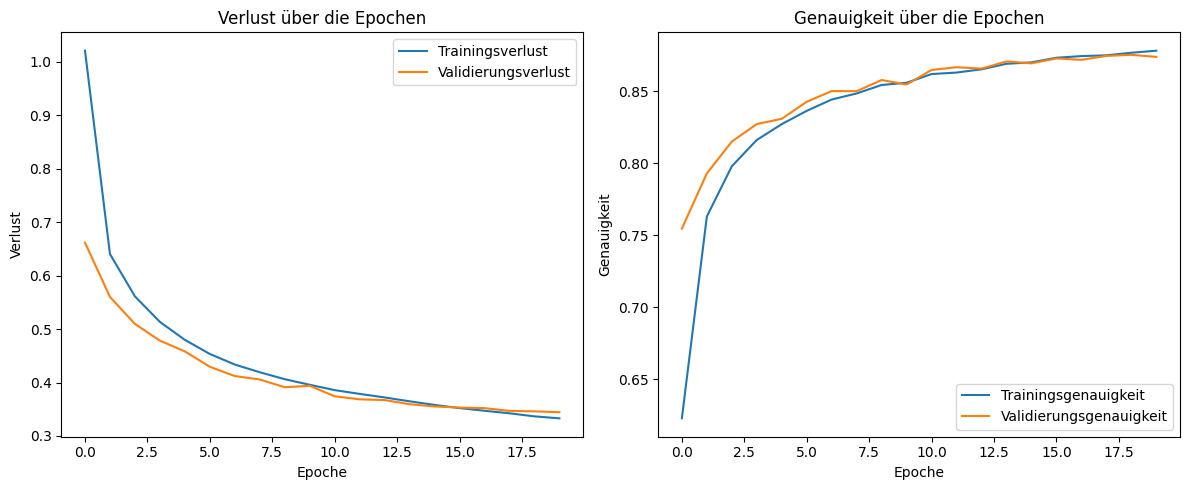

In [ ]:
# Verlust und Genauigkeit über die Epochen visualisieren
plt.figure(figsize=(12, 5))

# Verlust
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Verlust über die Epochen')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.legend()

# Genauigkeit
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Genauigkeit über die Epochen')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend()

plt.tight_layout()
plt.show()

Testverlust: 0.3720
Testgenauigkeit: 0.8666
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


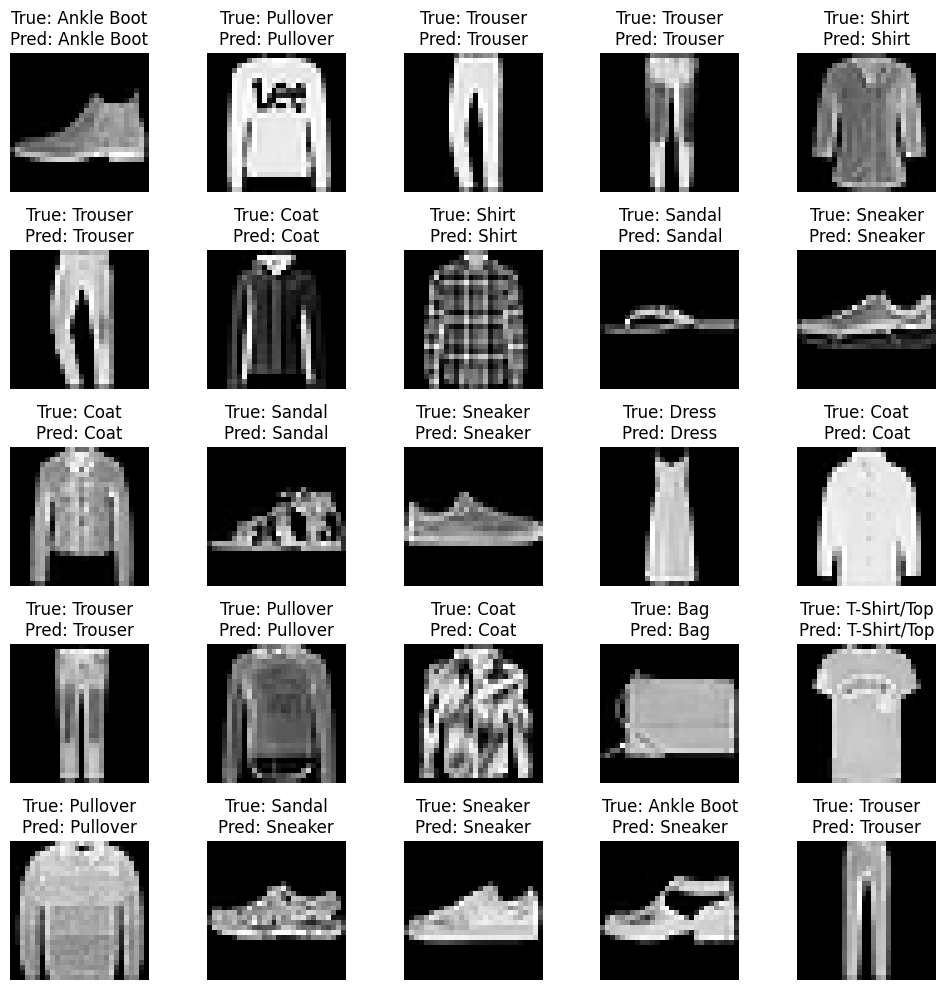

In [ ]:
# Modell auf Testdaten evaluieren
test_loss, test_accuracy = mlp_model.evaluate(X_test_flatten, y_test_one_hot, verbose=0)
print(f"Testverlust: {test_loss:.4f}")
print(f"Testgenauigkeit: {test_accuracy:.4f}")

# Vorhersagen auf Testbildern
predictions = mlp_model.predict(X_test_flatten)
predicted_classes = np.argmax(predictions, axis=1)

# Beispielvorhersagen visualisieren
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

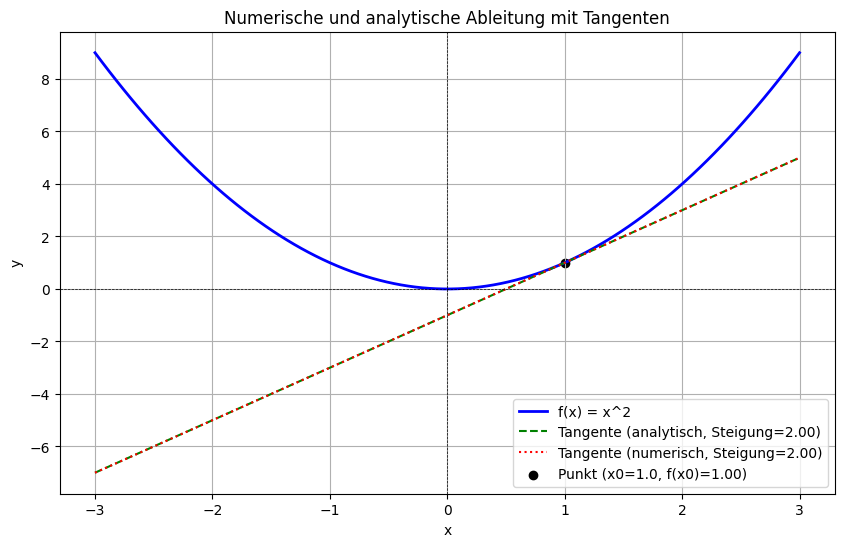

In [ ]:
# Funktion und analytische Ableitung
def f(x):
    return x**2

def f_prime(x):
    return 2 * x  # Analytische Ableitung

# Numerische Ableitung (zentrale Differenzen)
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Punkt, an dem die Ableitung berechnet wird
x0 = 1.0  # Stelle, an der die Ableitung visualisiert wird
y0 = f(x0)  # Funktionswert an x0

# Analytische und numerische Ableitungen an x0
analytical_slope = f_prime(x0)
numerical_slope = numerical_derivative(f, x0)

# Tangente definieren
def tangent_line(x, slope, x0, y0):
    return slope * (x - x0) + y0

# Bereich für x-Werte
x = np.linspace(-3, 3, 100)

# Funktionswerte berechnen
y = f(x)

# Tangentenwerte berechnen
tangent_analytical = tangent_line(x, analytical_slope, x0, y0)
tangent_numerical = tangent_line(x, numerical_slope, x0, y0)

# Plotten
plt.figure(figsize=(10, 6))

# Funktion plotten
plt.plot(x, y, label="f(x) = x^2", color="blue", linewidth=2)

# Analytische Tangente plotten
plt.plot(x, tangent_analytical, label=f"Tangente (analytisch, Steigung={analytical_slope:.2f})", color="green", linestyle="--")

# Numerische Tangente plotten
plt.plot(x, tangent_numerical, label=f"Tangente (numerisch, Steigung={numerical_slope:.2f})", color="red", linestyle=":")

# Punkt (x0, f(x0)) markieren
plt.scatter([x0], [y0], color="black", label=f"Punkt (x0={x0}, f(x0)={y0:.2f})")

# Details hinzufügen
plt.title("Numerische und analytische Ableitung mit Tangenten")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()

Wir modellieren eine einfache lineare Funktion
$$y=wx + b$$
 und verwenden Gradient Descent, um $w$ (Gewicht) und $b$ (Bias) zu optimieren.

In [ ]:
# Beispiel-Datensatz
X = np.array([1, 2, 3, 4, 5])  # Eingaben
y = np.array([2.2, 4.1, 5.9, 8.1, 9.8])  # Zielwerte

# Ziel:
# Finde die Parameter w (Gewicht) und b (Bias), sodass:
# y ≈ w * X + b

Die Verlustfunktion misst, wie gut unsere Vorhersagen die Zielwerte approximieren. Hier verwenden wir den Mean Squared Error (MSE):

$$L(w,b)=\sum_{n=1}^{N}(y_n - (wx_n + b))^2$$

In [ ]:
# Verlustfunktion
def loss(w, b, X, y):
    y_pred = w * X + b  # Vorhersage
    return np.mean((y - y_pred) ** 2)  # Mean Squared Error (MSE)

# Beispielhafte Werte für w und b
w, b = 0.0, 0.0
print(f"Anfänglicher Verlust: {loss(w, b, X, y):.4f}")

Anfänglicher Verlust: 43.6220


Wir approximieren die Ableitung der Verlustfunktion nach $w$ und $b$ mit der zentralen Differenzmethode:

$$\frac{\partial L}{\partial w}\approx\frac{L(w+h,b)-L(w-h,b)}{2h}$$

bzw.:

$$\frac{\partial L}{\partial b}\approx\frac{L(w,b+h)-L(w,b-h)}{2h}$$

In [ ]:
# Numerische Ableitung
def compute_gradients(w, b, X, y, h=1e-5):
    # Gradient nach w
    grad_w = (loss(w + h, b, X, y) - loss(w - h, b, X, y)) / (2 * h)
    # Gradient nach b
    grad_b = (loss(w, b + h, X, y) - loss(w, b - h, X, y)) / (2 * h)
    return grad_w, grad_b

# Beispiel: Gradienten berechnen
grad_w, grad_b = compute_gradients(w, b, X, y)
print(f"Gradient w: {grad_w:.4f}, Gradient b: {grad_b:.4f}")

Gradient w: -43.8000, Gradient b: -12.0400


Gradient Descent aktualisiert $w$ und $b$, um den Verlust zu minimieren:

$$w \leftarrow w-\eta\frac{\partial L}{\partial w}$$

und

$$b \leftarrow w-\eta\frac{\partial L}{\partial b}$$

In [ ]:
# Gradient Descent
def gradient_descent(X, y, w_init, b_init, learning_rate, epochs):
    w, b = w_init, b_init
    losses = []  # Verlaufsaufzeichnung

    for epoch in range(epochs):
        # Gradienten berechnen
        grad_w, grad_b = compute_gradients(w, b, X, y)

        # Parameter aktualisieren
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Verlust berechnen
        current_loss = loss(w, b, X, y)
        losses.append(current_loss)

        # Fortschritt ausgeben
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoche {epoch + 1}/{epochs}, Verlust: {current_loss:.4f}")

    return w, b, losses

# Training starten
w_opt, b_opt, losses = gradient_descent(X, y, w_init=0.0, b_init=0.0, learning_rate=0.01, epochs=100)
print(f"Optimierte Parameter: w = {w_opt:.4f}, b = {b_opt:.4f}")

Epoche 1/100, Verlust: 25.4292
Epoche 10/100, Verlust: 0.2166
Epoche 20/100, Verlust: 0.0198
Epoche 30/100, Verlust: 0.0183
Epoche 40/100, Verlust: 0.0176
Epoche 50/100, Verlust: 0.0171
Epoche 60/100, Verlust: 0.0165
Epoche 70/100, Verlust: 0.0160
Epoche 80/100, Verlust: 0.0155
Epoche 90/100, Verlust: 0.0151
Epoche 100/100, Verlust: 0.0147
Optimierte Parameter: w = 1.8702, b = 0.4399


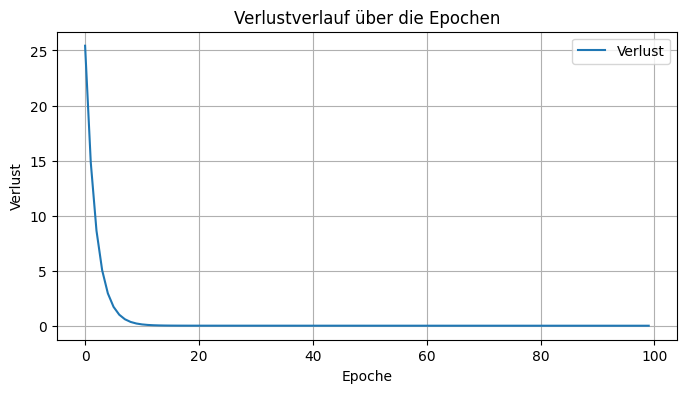

In [ ]:
# Verlustverlauf plotten
plt.figure(figsize=(8, 4))
plt.plot(losses, label="Verlust")
plt.title("Verlustverlauf über die Epochen")
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.grid(True)
plt.legend()
plt.show()

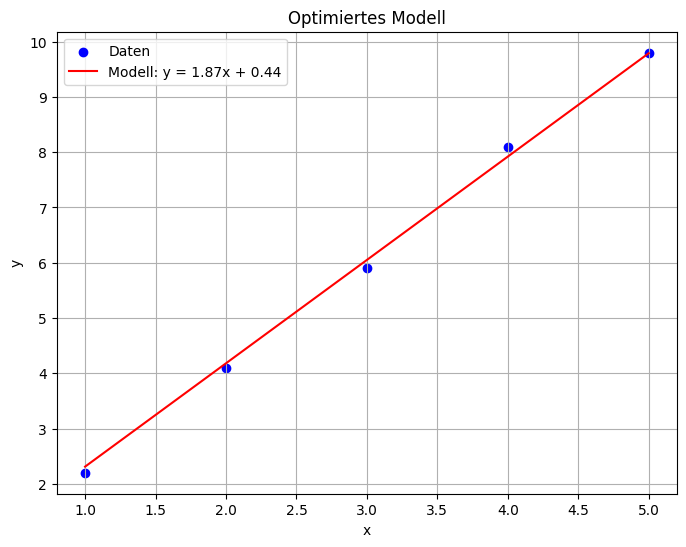

In [ ]:
# Daten und optimierte Funktion visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Daten")
plt.plot(X, w_opt * X + b_opt, color='red', label=f"Modell: y = {w_opt:.2f}x + {b_opt:.2f}")
plt.title("Optimiertes Modell")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()